In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from src.utils.logger import logger

In [4]:
from src.utils.file_utils import load_numpy_zc

# Load the features file for further use
file_name = os.path.join('.', 'data', 'X.npz')
X, = load_numpy_zc(file_name, ['X'])

15:56:15 INFO (file_utils:32): Loading compressed numpy z file from: ./data/X.npz
15:56:15 INFO (file_utils:35): File loading and data extraction are done!


In [96]:
from tqdm.notebook import tqdm
from src.model.dbscan.tuning import fit_dbscan_clusters

# According to:
#     https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# the min_samples sizee for the dataset is to be chosen as:
#     min_samples = 2 * dim ( where dim is the dimensions of your data set)
min_samples = 2 * X.shape[1]
logger.info(f'Choosing the min_samples value: {min_samples}')

# Perform primitive grid search using the S value of the kneed algorithm
s_values = list(range(1, 60, 2))
labels_cnt, eps_values, cluster_ids, clust_sizes = [], [], [], []
for s_value in tqdm(s_values, desc=f'Computing number of clusters'):
    eps_value, cluster_labels, label_counts = fit_dbscan_clusters(X, min_samples, s_value)
    eps_values.append(eps_values)
    labels_cnt.append(len(cluster_labels))
    cluster_ids.append(cluster_labels)
    clust_sizes.append(label_counts)

17:32:25 INFO (1345417908:9): Choosing the min_samples value: 18


Computing number of clusters:   0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Number of clusters')

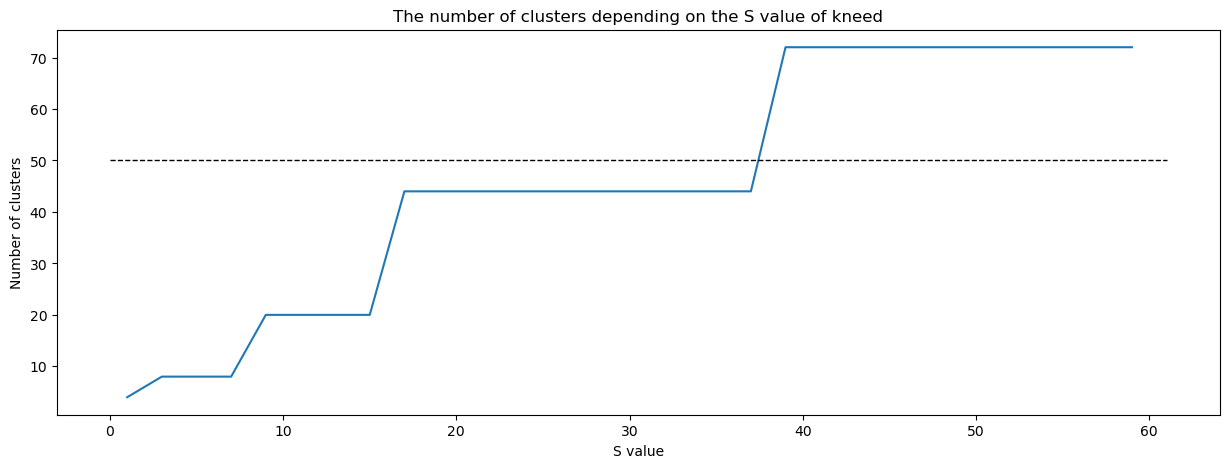

In [97]:
# Plot the resulting data number of clusters depending on the S value for finding the knee/elbow point
# Note that the task claims there can be at most 50 attack classes
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(s_values, labels_cnt)
plt.plot([0, 61], [50, 50], 'k--', lw=1)
plt.title('The number of clusters depending on the S value of kneed')
ax.set_xlabel('S value')
ax.set_ylabel('Number of clusters')

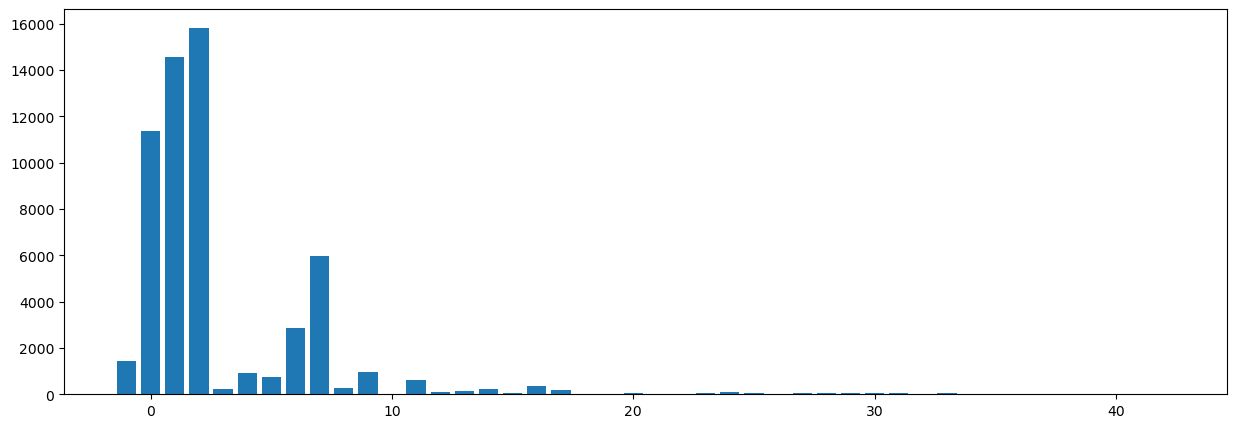

In [101]:
# From the plot above, the last S-value before the just to 70+ clusters is S = 37
# Let us plot the corresponding cluster sizes
fig, ax = plt.subplots(figsize=(15, 5))
index = s_values.index(37)
_ = plt.bar(x=cluster_ids[index], height=clust_sizes[index])

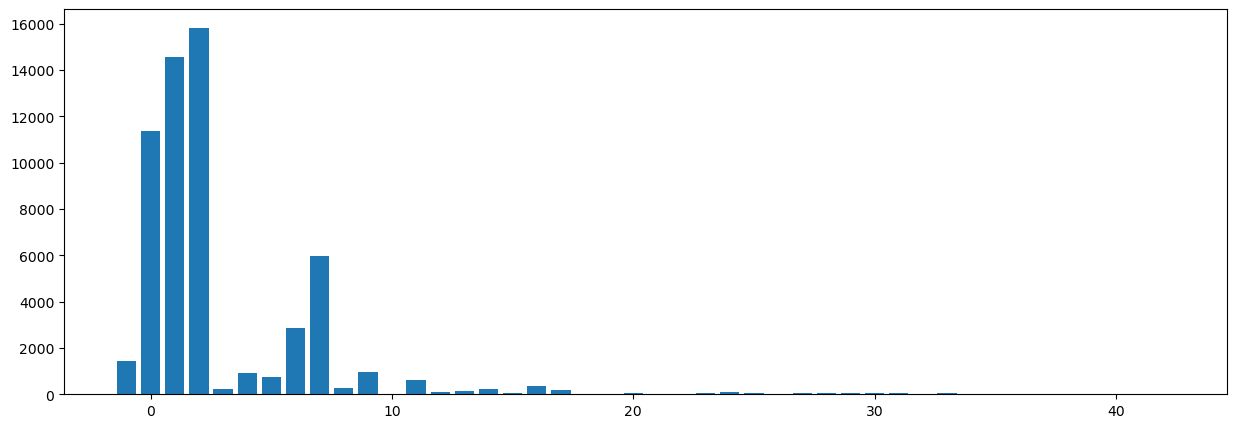

In [102]:
# From the plot above, the first S-value before we go to 70+ clusters from 44 is S = 27
# Let us plot the corresponding cluster sizes
fig, ax = plt.subplots(figsize=(15, 5))
index = s_values.index(27)
_ = plt.bar(x=cluster_ids[index], height=clust_sizes[index])

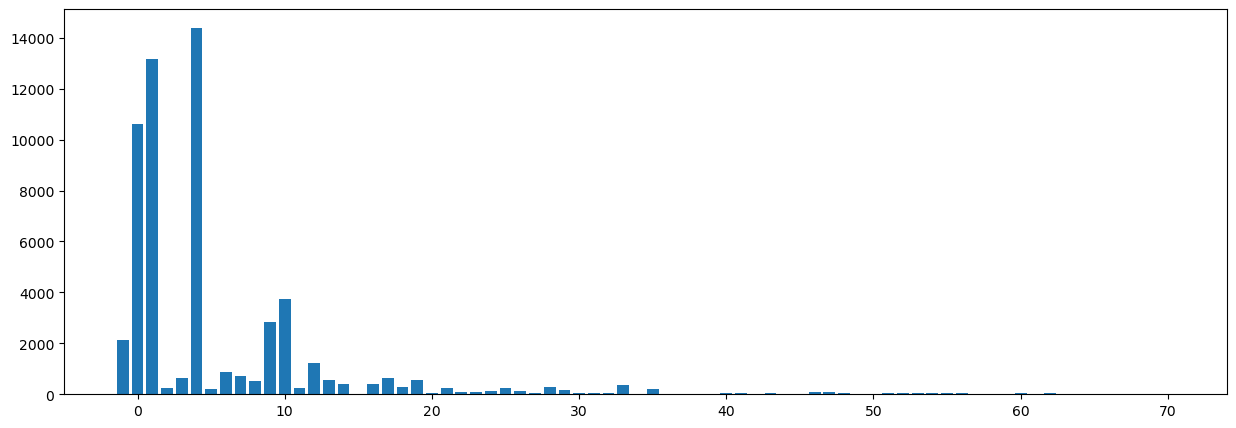

In [103]:
# From the plot above, the last S-value before the just to 70+ clusters is S = 37
# Let us plot the corresponding cluster sizes
fig, ax = plt.subplots(figsize=(15, 5))
index = s_values.index(39)
_ = plt.bar(x=cluster_ids[index], height=clust_sizes[index])

In [68]:
# TODO: Tune hyperparameters to find the optimal number of clusters

In [ ]:
# TODO: For each cluster compute the central point and the radius

In [ ]:
# TODO: Store the trained models (TfidfVectorizer, PCA and etc) along with the Classifier information: Class Id, Central point, Radius